# 轮次

在深度学习中，无论采用哪种梯度下降的方法，将整个训练集遍历一遍的过程称为一个**轮次**（Epoch）。

如果训练集有 $n$ 个样本：
* **随机梯度下降**：每轮进行 $n$ 次迭代。
* **批量梯度下降**：每轮仅 1 次迭代。
* **小批量梯度下降**（批大小 $m$）：每轮进行 $n/m$ 次迭代。

通常，网络模型需要**多个轮次**的重复训练，才能使参数充分收敛到较优状态。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

``💡 Matplotlib 是一个用于 Python 的强大数据可视化库，能够创建高质量的静态、动态和交互式图表。``

## 数据集

### 训练数据：特征、标签

In [2]:
train_features = np.array([[22.5, 72.0],
                           [31.4, 45.0],
                           [19.8, 85.0],
                           [27.6, 63.0]])
train_labels = np.array([[95],
                        [210],
                        [70],
                        [155]])

### 测试数据：特征、标签

In [3]:
test_features = np.array([[28.1, 58.0]])
test_labels = np.array([[165]])

## 模型

### 参数：权重、偏置

In [4]:
weight = np.ones((1, 2)) / 2
bias = np.zeros(1)

### 推理函数

In [5]:
def forward(x, w, b):
    return x @ w.T + b

### 损失函数（均方误差）

In [6]:
def mse_loss(p, y):
    return np.mean(np.square(y - p))

### 梯度函数

In [7]:
def gradient(p, y):
    return - 2 * (y - p) / len(y)

### 反向函数

In [8]:
def backward(x, d, w, b, lr):
    w -= d.T @ x * lr
    b -= np.sum(d, axis=0) * lr
    return w, b

## 训练

### 超参数：学习率

In [9]:
LEARNING_RATE = 0.00001

### 超参数：批大小

In [10]:
BATCH_SIZE = 2

### 超参数：轮数

这是我们的第三个超参数。**轮数**（Epochs）定义了模型训练中，训练数据的重复迭代次数。

轮数并非越多越好：

* 在训练初期，模型参数通常会随着轮次增加而快速收敛，误差大幅下降；
* 随后，收敛速度逐渐趋于平缓；
* 如果轮数过多，模型可能会由于**过拟合**，导致在实际应用中的效果反而变差。

因此，我们需要通过监测网络模型在测试数据上的表现，找到性能提升的**拐点**（Turning Point），从而确定最佳轮数：

* 轮数太少：欠拟合。
* 轮数太多：可能过拟合。

一个有效的实践技巧叫做**早停**（Early Stopping）。就是在每个轮次结束后，和上一轮对比。如果损失量没有明显降低（比如：大于 1%），就停止训练。

In [11]:
EPOCHS = 1000

### 迭代

实践中，我们可以使用一个简单循环来实现重复迭代。

或者也可以在每个轮次里打乱训练数据的迭代次序，以期进一步优化训练。这种实践技巧称为**重排**（Shuffle）。

In [12]:
for epoch in range(EPOCHS):
    for i in range(0, len(train_features), BATCH_SIZE):
        features = train_features[i: i + BATCH_SIZE]
        labels = train_labels[i: i + BATCH_SIZE]

        predictions = forward(features, weight, bias)
        delta = gradient(predictions, labels)
        weight, bias = backward(features, delta, weight, bias, LEARNING_RATE)

print(f"weight: {weight}")
print(f"bias: {bias}")

weight: [[ 8.04709172 -1.08194575]]
bias: [0.15285452]


## 验证

### 推理

In [13]:
predictions = forward(test_features, weight, bias)
print(f'predictions: {predictions}')

predictions: [[163.52327795]]


### 评估

In [14]:
loss = mse_loss(predictions, test_labels)
print(f'loss: {loss}')

loss: 2.1807080003283335


经过1000轮迭代，损失值神奇地降低至个位数。

至此，我们可以宣布：模型训练成功！

### 损失曲线

最后，让我们监控一下每轮训练损失值的变化，直观地感受一下模型训练的过程，观察一下哪里是**拐点**。

我们使用 matplotlib 来展示随着轮次增加，损失值的变化。

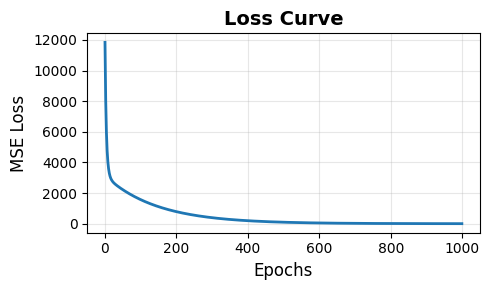

In [15]:
# 初始化模型参数
weight = np.ones([1, 2]) / 2
bias = np.zeros(1)

losses = []

for epoch in range(EPOCHS):
    # 训练
    for i in range(0, len(train_features), BATCH_SIZE):
        features = train_features[i: i + BATCH_SIZE]
        labels = train_labels[i: i + BATCH_SIZE]

        predictions = forward(features, weight, bias)
        delta = gradient(predictions, labels)
        weight, bias = backward(features, delta, weight, bias, LEARNING_RATE)

    # 验证
    predictions = forward(test_features, weight, bias)
    losses.append(mse_loss(predictions, test_labels))

# 展示
plt.figure(figsize=(5, 3))
plt.plot(losses, linewidth=2)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('Loss Curve', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

上图是模型训练的**损失曲线**（Loss Curve），直观地向我们展示了随着轮次的增加，损失值快速降低，然后逐渐趋于平缓的过程。

## 课后练习

* 尝试在迭代过程中实现**早停**机制。调整早停的比例（比如：0.1%、0.5%、1%），观察对训练轮数有什么影响？
* 尝试在迭代过程中实现**重排**机制。观察对损失量有什么影响？
* 观察上面的损失曲线，你认为哪里是**拐点**？